# Table of Content

* Introduction

* Importing data and modules

* Basic Data Exploration

* Feature Engineering

  Word Embedding

     (a) Bag of Words

   (b)  IF-IDF

* Modelling

* Saving the Model

* Conclusion

# Introduction


[Resume screening](https://drive.google.com/file/d/1XH3UL8BlXwmT6dhLCUsjiXDKFKIRml15/view?usp=sharing) is the process by which a firm or institute decides a given candidate is suitable for the given position or not. It is often the first step in the proces of hiring individuals in the firm. Since the screeening is the first and thus, considered one of the important process in hiring people in the company, our model will help towards the smooth and hasselfree hiring of the employees. Also, when the company employees the ones with best skill set and talent, it will able to maximize its productivity and thus, helps in achieving the business objective of maximum profits.


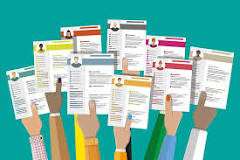

In [96]:
# importing modules  and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from google.colab import files
import io
# download all the resources needed for the analysis
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [97]:
# getting the dataset link 
uploaded = files.upload()

Saving UpdatedResumeDataSet.csv to UpdatedResumeDataSet (1).csv


In [98]:
df = pd.read_csv(io.BytesIO(uploaded['UpdatedResumeDataSet.csv']))

In [99]:
# look at the head
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


The first column is the actual category for which resume is received, the second column is the important details such as skills and education provided in the resume.

In [100]:
# look at the number of resumes 
print("There are {} number of resumes in the given dataset".format(df.shape[0]))

There are 962 number of resumes in the given dataset


In [101]:
# look at the null values presence
df.isnull().sum()

Category    0
Resume      0
dtype: int64

No null values

In [102]:
# categorize count
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

Text(0.5, 1.0, 'Top Five Resume Categories')

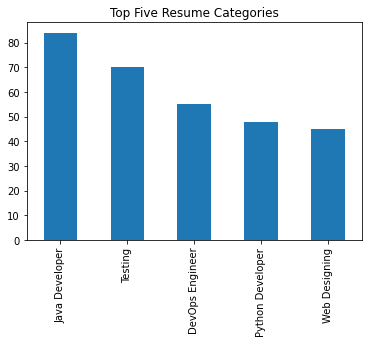

In [103]:
# look at the top 5 categories
df['Category'].value_counts()[:5].plot(kind='bar')
plt.title('Top Five Resume Categories')

Text(0.5, 1.0, 'Bottom Five Resume Categories')

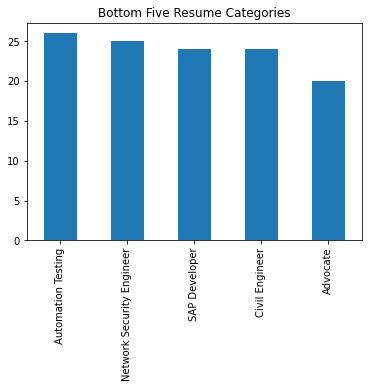

In [104]:
# bottom 5 categories
df['Category'].value_counts()[-5:].plot(kind='bar')
plt.title('Bottom Five Resume Categories')

### Wordcloud

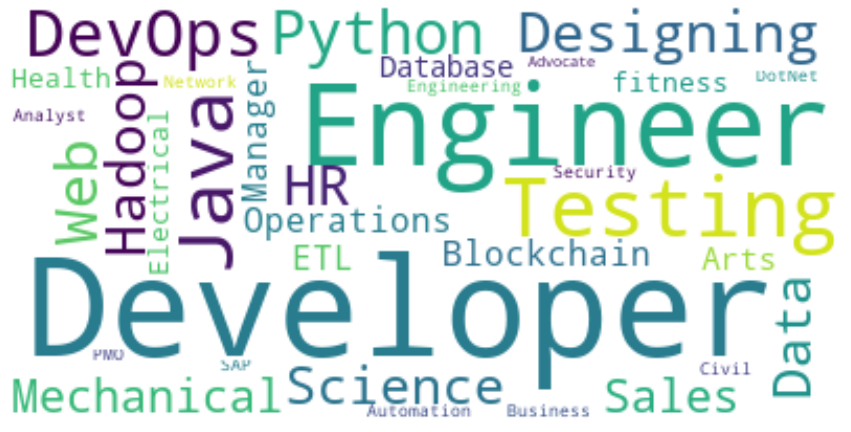

In [105]:
from wordcloud import WordCloud,STOPWORDS
stop_w  = set(STOPWORDS )
# figsize
plt.figure(figsize=(15,20))
# forming a text (a prerequisite for creating a cloud)
text = " ".join(df['Category'])
# initializing it
wc = WordCloud(background_color ='white',stopwords=stop_w ,collocations=False).generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()


In our dataset, we have most categories with a developer , testing, engineer.

In [106]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [107]:
# initialize a lemmatizee
word_lem = WordNetLemmatizer()

# initialize stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
word_corpus =[]
def clean_text(text):
  
  """ 
We will get a text which is cleaned and normalized to be 
able to work ahead for generating vectors

"""

  for x in range(len(text)):
    # replace non-word characters as many as possible
    review= re.sub('[^a-zA-Z]'," ",text[x])
    # removing ANY FIRST OCCRUENCE OF numbers 
    #review = re.sub('[\d+a-zA-Z]$'," ",review)
    # lowering each word  for consistency
    # lower and split each word
    review = review.lower()
    review = review.split()
    # lemmatize the word
    review  = [word_lem.lemmatize(word) for word in review if word not in stop_words]
    # appending to the corpus
    review = " ".join(review)
    word_corpus.append(review)

  return word_corpus 



In [108]:
# making use of the defined function
df['Cleaned_Resume'] = clean_text(df['Resume'])

In [109]:
# look at the newly created column
df['Cleaned_Resume']

0      skill programming language python panda numpy ...
1      education detail may may b e uit rgpv data sci...
2      area interest deep learning control system des...
3      skill r python sap hana tableau sap hana sql s...
4      education detail mca ymcaust faridabad haryana...
                             ...                        
957    computer skill proficient m office word basic ...
958    willingness accept challenge positive thinking...
959    personal skill quick learner eagerness learn n...
960    computer skill software knowledge m power poin...
961    skill set o window xp database mysql sql serve...
Name: Cleaned_Resume, Length: 962, dtype: object

In [110]:
# look at the first row value
#word_corpus[0].count()
len('rishabh')

7

# Using Count Vectorizer
W would be implementing count vectorize of sklearn to create a bag of words like vector matrix.

Here, we can conduct the previous procesing with the help of count vectorize with the use of its different parameters, but it is always good to do it on your own.


In [111]:
from sklearn.feature_extraction.text import CountVectorizer
# initialize it
cv = CountVectorizer(ngram_range=(2,2))
X = cv.fit_transform(df['Cleaned_Resume'])

In [112]:
# convert into array
X_arr  = X.toarray()

### Label Encoding for Category

For the model, category will act as the label or dependent variable.



In [113]:
# labelling encoding to get the label of each category of job
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
Y = le.fit_transform(df['Category'])
Y_arr = np.array(Y)

In [114]:
# look at the array of independent and dependent variables
print(X_arr)
print(Y_arr)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 24 24 24 24
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 

#### Dividing into train and test dataset


In [115]:
from sklearn.model_selection import train_test_split
# divide into train_test
X_train,X_test,Y_train,Y_test = train_test_split(X_arr,Y_arr,test_size=0.3,random_state=4,stratify= Y_arr)

# Modelling part

We will make use of [Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html) which is extremely useful for small datasets (like the given one with less than 1000 features) with massive number of features.

In [116]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)

SVC()

In [117]:
# predict
y_pred = model.predict(X_test)

In [118]:
# Accuracy
accuracy_score(y_pred,Y_test)

0.9273356401384083

In [119]:
# classification
print(classification_report(y_pred,Y_test,zero_division=False),)

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       1.00      1.00      1.00        11
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         8
           5       0.86      1.00      0.92         6
           6       1.00      0.92      0.96        13
           7       1.00      0.83      0.91        12
           8       0.88      1.00      0.94        15
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         9
          12       1.00      0.42      0.59        31
          13       1.00      1.00      1.00        13
          14       0.33      1.00      0.50         3
          15       0.92      1.00      0.96        23
          16       1.00      1.00      1.00        12
          17       1.00    

The basic model does a fair job and gives us a prediction accruacy of 93 percent on average. The point to consider is that we have used bag of words (which is a fundamental and simple way of word embedding) still we get a very good accuracy score of 92. Also, another point is that the we choose a test size of 30 percent which is really good enough for testing the performance of the model.


Another point is that the model did produce an accuracy of 100 percent for maximum labels or categories while there are only a few with accuracy of less than 80 percent. So, the main focus would be to improve or learn the pattern on these categories.


# TF-IDF

Now, we will consider applying the TF-IDF vectorizer model which looks for the presence of word in a sentence and also, across the corpus

In this text preprocessing, we calculate the product of term frequency , which is the number of times a word occurence in a document relative to total words , and inverse document frequency, which related to the log of number of sentences or documents in the text data to the number of sentences containing the word.

Compared to Bag of words, it tries to understand semantic meaning or implication. So, higher the value of a feature or word , more would be its relevance .


In [120]:
# importing it
from sklearn.feature_extraction.text import TfidfVectorizer
# initialize it
tf_idf =  TfidfVectorizer()
# transforming the variable x
X = tf_idf.fit_transform(df['Cleaned_Resume'])
# convert into array
X_arr  = X.toarray()

In [121]:
from sklearn.model_selection import train_test_split
# divide into train_test
X_train,X_test,Y_train,Y_test = train_test_split(X_arr,Y_arr,test_size=0.3,random_state=4,stratify= Y_arr)

In [122]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)

SVC()

In [123]:
# predict
y_pred = model.predict(X_test)

In [124]:
# Accuracy
accuracy_score(y_pred,Y_test)

0.9930795847750865

In [125]:
# classification
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        10
           8       0.88      1.00      0.94        15
           9       1.00      0.89      0.94         9
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00         9
          15       1.00      0.96      0.98        26
          16       1.00      1.00      1.00        12
          17       1.00    

The change in X-vector creation from Bag of words to IF-IDF vectorizer has led to an about 7 percent improvement in accuracy.



In other words, now about 99 out of 100 resumes are properly screened or categorized by the model.

Morover, the model has same value for all other important metrics such as f1, recall. It suggests that the model is able to predict better out of actual 00----write more as well.






## Saving the model

The model which we have just created will be saved for the future references. It will be done using [joblib](https://joblib.readthedocs.io/en/latest/) library.

In [126]:
# importing joblib library for saving model
import joblib
# using to dump_or save model in the form of .sav (which is done for future statistical analysis)
joblib.dump(model,'resume_screening_model.sav')

['resume_screening_model.sav']

In [127]:
# load the model
resume_screened_model = joblib.load('resume_screening_model.sav')

In [128]:
# using it to predict for X_test and Y_test
print("The accuracy of the model on the whole daatset is {} % ".format(round(resume_screened_model.score(X_test,Y_test)*100),0))

The accuracy of the model on the whole daatset is 99 % 


# Conclusion :


In this notebook, we started with a basic or general exploration of the dataset such as frequency of each category. Since the algorithm works with numerical data only, we used word embedding techniques to derive a numerical vector out of the text. 




We started with bag of words technique which gives use one-hot type vector based on the occurence of a word in a sentence. It gave us an accuracy of 92 percent using Support Vector Machine algorithm. In order to improve it, we applied a higher and better technique of word embedding , that is tf_idf vectorizer. It was able to improve our accuracy by 7 percent and gave a total accuract of 99 percent. This implies that each 99 out of 100 sample resumes were correctly predicted by the model.



###  References:

sklearn package: https://scikit-learn.org/

nltk  :https://www.nltk.org/

Regex: https://docs.python.org/3/howto/regex.html#regex-howto

